# Library Import

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,ConfusionMatrixDisplay
import joblib
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [8]:
df=pd.read_csv('employee_performance_with_edu_correlation.csv')

# Exploratory Data Analysis (EDA)

### Data Understanding

In [11]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,7250.0,33.0,32,0,2,0.0,14,76.0,2,4,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34.0,34,0,14,75.0,12,72.0,4,4,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,7850.0,37.0,27,0,3,NaN,10,10.0,1,3,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,6550.0,52.0,10,21,12,100.0,10,3.0,2,1,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,5550.0,38.0,11,15,13,100.0,15,12.0,2,1,False


In [12]:
df.tail()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,5150.0,55.0,46,0,3,75.0,16,63.0,4,3,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,9750.0,39.0,35,0,0,0.0,10,88.0,3,4,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,6800.0,31.0,13,0,5,0.0,5,91.0,2,2,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,10500.0,35.0,43,0,1,50.0,2,45.0,3,4,False
99999,100000,Finance,Female,43,Analyst,2024-03-04 08:03:05.556036,0,PhD,2,4400.0,51.0,43,26,11,75.0,13,59.0,1,1,False


In [13]:
df.size

2000000

In [14]:
df.shape

(100000, 20)

In [15]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          91951 non-null   float64
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [17]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,91951.000000,100000.000000,100000.000000,100000.000000,89975.000000,100000.000000,97035.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,3.154620,7522.228500,44.971583,24.431170,4.322250,7.008550,46.094749,10.013560,57.314979,2.197200,2.499530
std,28867.657797,11.244121,2.869336,1.407314,1548.250283,8.941265,14.469584,6.838178,4.331591,35.139883,5.495405,29.299516,1.105687,1.118022
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,6400.000000,37.000000,12.000000,0.000000,3.000000,25.000000,5.000000,32.000000,1.000000,1.000000
50%,50000.500000,41.000000,4.000000,3.000000,7500.000000,45.000000,24.000000,0.000000,7.000000,50.000000,10.000000,57.000000,2.000000,2.000000
75%,75000.250000,51.000000,7.000000,4.000000,8650.000000,53.000000,37.000000,7.000000,11.000000,75.000000,15.000000,82.000000,3.000000,3.000000
max,100000.000000,60.000000,10.000000,5.000000,11500.000000,60.000000,49.000000,33.000000,14.000000,100.000000,19.000000,115.000000,4.000000,4.000000


### Data Quality Checks

In [19]:
df.isnull().sum()

Employee_ID                        0
Department                         0
Gender                             0
Age                                0
Job_Title                          0
Hire_Date                          0
Years_At_Company                   0
Education_Level                    0
Performance_Score                  0
Monthly_Salary                     0
Work_Hours_Per_Week             8049
Projects_Handled                   0
Overtime_Hours                     0
Sick_Days                          0
Remote_Work_Frequency          10025
Team_Size                          0
Training_Hours                  2965
Promotions                         0
Employee_Satisfaction_Score        0
Resigned                           0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df.dtypes

Employee_ID                      int64
Department                      object
Gender                          object
Age                              int64
Job_Title                       object
Hire_Date                       object
Years_At_Company                 int64
Education_Level                 object
Performance_Score                int64
Monthly_Salary                 float64
Work_Hours_Per_Week            float64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency          float64
Team_Size                        int64
Training_Hours                 float64
Promotions                       int64
Employee_Satisfaction_Score      int64
Resigned                          bool
dtype: object

### Data Visualization

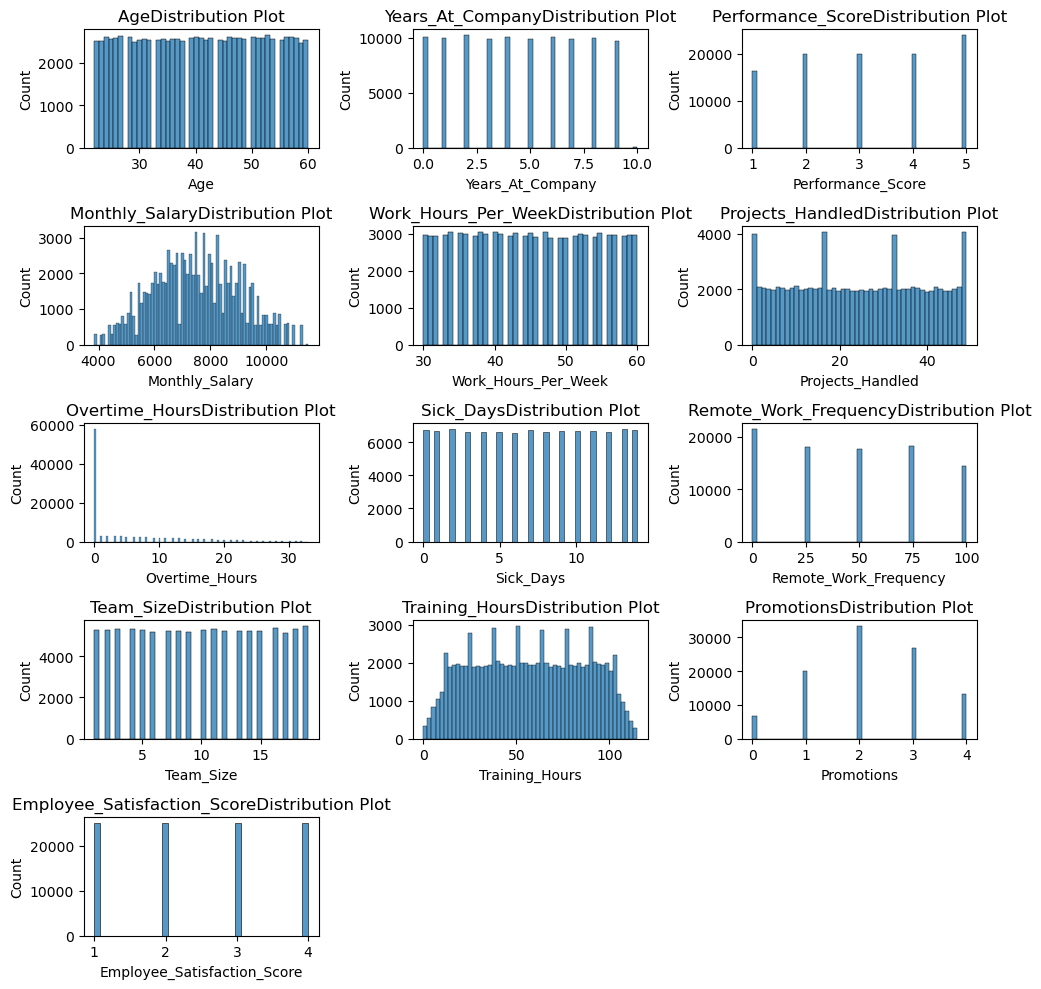

In [23]:
numerical_col=df.select_dtypes(include='number').columns.tolist()
if 'Employee_ID' in numerical_col:
    numerical_col.remove('Employee_ID')
plt.figure(figsize=(10,10))
for j,coli in enumerate(numerical_col):
    plt.subplot(5,3,j+1)
    sns.histplot(x=df[coli])
    plt.title(f'{coli}Distribution Plot')
plt.tight_layout()
plt.show()

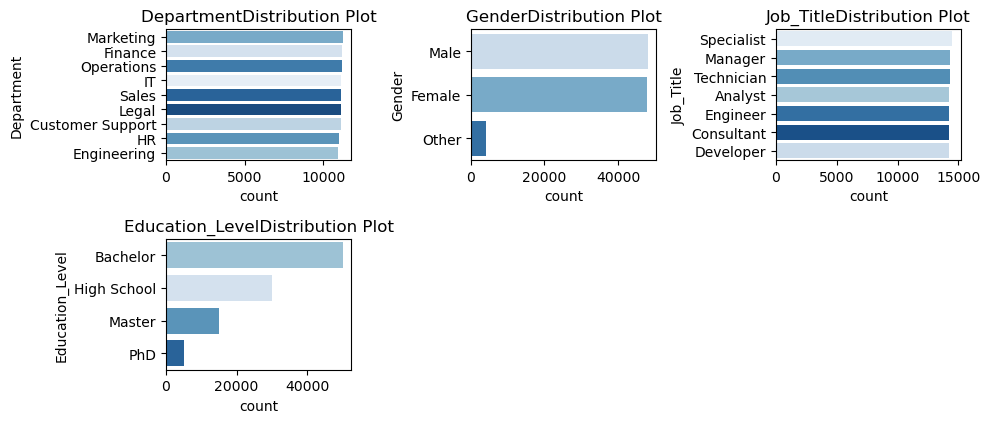

In [24]:
categorical_col=df.select_dtypes(include='object').columns.tolist()
if 'Hire_Date' in categorical_col:
    categorical_col.remove('Hire_Date')
plt.figure(figsize=(10,6))
for i,col in enumerate(categorical_col):
    plt.subplot(3,3,i+1)
    sns.countplot(y=df[col],hue=df[col],palette='Blues',order=df[col].value_counts().index)
    plt.title(f'{col}Distribution Plot')
plt.tight_layout()
plt.show()

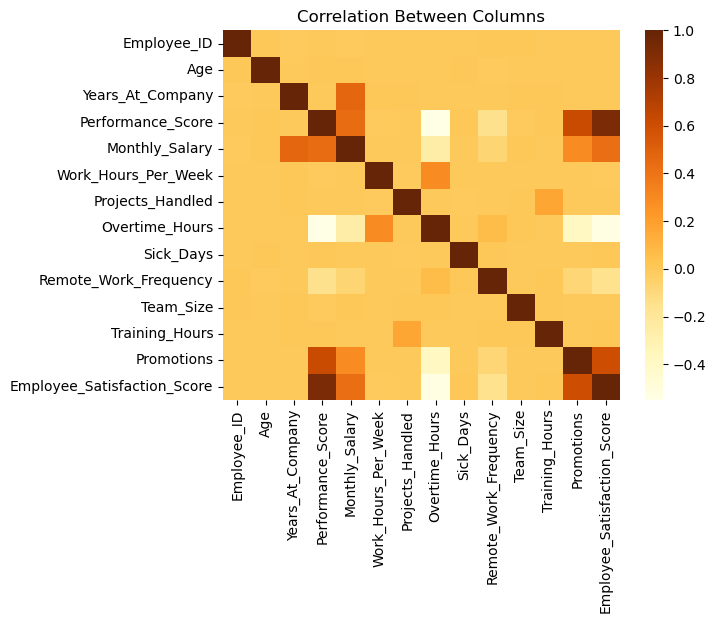

In [25]:
sns.heatmap(df.select_dtypes(include='number').corr(),cmap='YlOrBr')
plt.title('Correlation Between Columns')
plt.show()

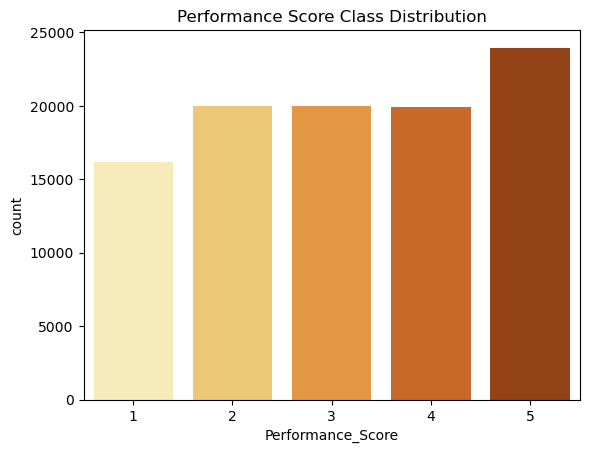

In [26]:
sns.barplot(df['Performance_Score'].value_counts(),palette='YlOrBr')
plt.title('Performance Score Class Distribution')
plt.show()

# Data Preprocess

### Handling Missing Values

In [29]:
df.isnull().sum()

Employee_ID                        0
Department                         0
Gender                             0
Age                                0
Job_Title                          0
Hire_Date                          0
Years_At_Company                   0
Education_Level                    0
Performance_Score                  0
Monthly_Salary                     0
Work_Hours_Per_Week             8049
Projects_Handled                   0
Overtime_Hours                     0
Sick_Days                          0
Remote_Work_Frequency          10025
Team_Size                          0
Training_Hours                  2965
Promotions                         0
Employee_Satisfaction_Score        0
Resigned                           0
dtype: int64

In [30]:
df['Work_Hours_Per_Week'].skew()

0.008331044238367611

In [31]:
df['Work_Hours_Per_Week']=df['Work_Hours_Per_Week'].fillna(df['Work_Hours_Per_Week'].mean())
df['Work_Hours_Per_Week'].isnull().sum()

0

In [32]:
df['Remote_Work_Frequency']=df['Remote_Work_Frequency'].fillna(df['Remote_Work_Frequency'].mode()[0])
df['Remote_Work_Frequency'].isnull().sum()

0

In [33]:
df['Training_Hours'].skew()

-0.003914371325005237

In [34]:
df['Training_Hours']=df['Training_Hours'].fillna(df['Training_Hours'].mean())
df['Training_Hours'].isnull().sum()

0

### Handling Outliers

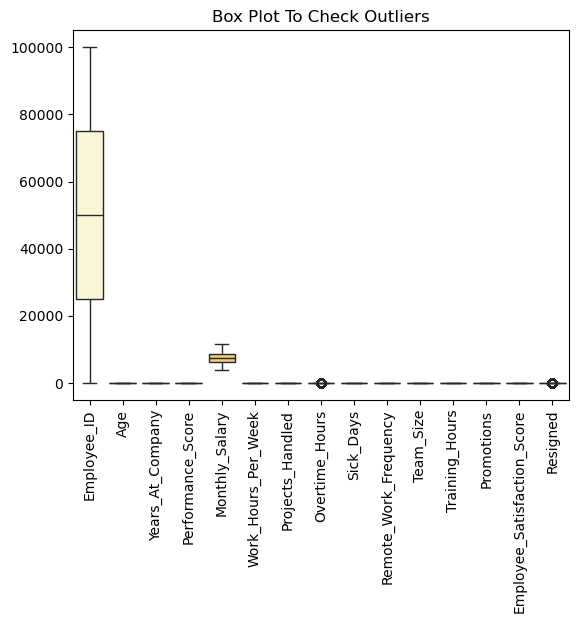

In [36]:
sns.boxplot(df,palette='YlOrBr')
plt.title('Box Plot To Check Outliers')
plt.xticks(rotation=90)
plt.show()

In [37]:
df['Resigned'].unique()

array([False,  True])

In [38]:
Q1=df['Overtime_Hours'].quantile(0.25)
Q3=df['Overtime_Hours'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
outliers=df['Overtime_Hours'][(df['Overtime_Hours']<lower_limit) | (df['Overtime_Hours']>upper_limit)]
outliers

3        21
18       26
23       22
26       19
30       18
         ..
99967    25
99972    18
99975    26
99994    29
99999    26
Name: Overtime_Hours, Length: 7269, dtype: int64

In [39]:
df['Overtime_Hours']=np.where(df['Overtime_Hours']<lower_limit,lower_limit,df['Overtime_Hours'])
df['Overtime_Hours']=np.where(df['Overtime_Hours']>upper_limit,upper_limit,df['Overtime_Hours'])

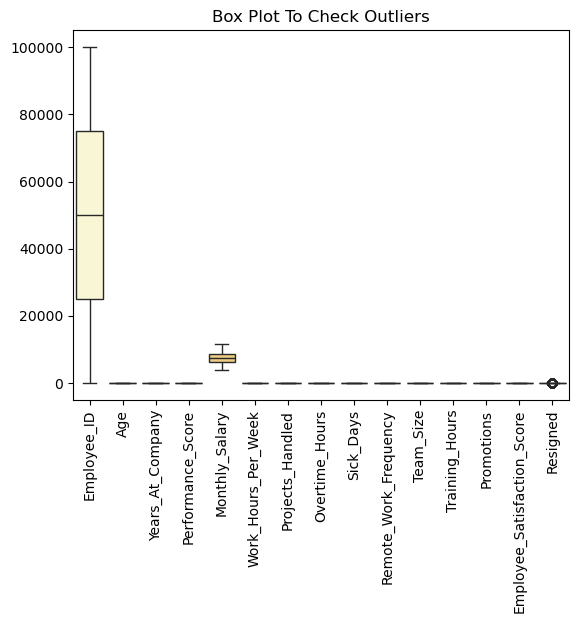

In [40]:
sns.boxplot(df,palette='YlOrBr')
plt.title('Box Plot To Check Outliers')
plt.xticks(rotation=90)
plt.show()

### Encoding Categorical Variables

In [42]:
df1=df.copy()
le_dep=LabelEncoder()
le_gen=LabelEncoder()
le_job=LabelEncoder()
le_edu=LabelEncoder()
le_per=LabelEncoder()
le_rwf=LabelEncoder()
le_ess=LabelEncoder()
le_res=LabelEncoder()
df1['Department']=le_dep.fit_transform(df1['Department'])
df1['Gender']=le_gen.fit_transform(df1['Gender'])
df1['Job_Title']=le_job.fit_transform(df1['Job_Title'])
df1['Education_Level']=le_edu.fit_transform(df1['Education_Level'])
df1['Performance_Score']=le_per.fit_transform(df1['Performance_Score'])
df1['Remote_Work_Frequency']=le_rwf.fit_transform(df1['Remote_Work_Frequency'])
df1['Employee_Satisfaction_Score']=le_ess.fit_transform(df1['Employee_Satisfaction_Score'])
df1['Resigned']=le_res.fit_transform(df1['Resigned'])
df1.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,4,1,55,5,2022-01-19 08:03:05.556036,2,1,4,7250.0,33.0,32,0.0,2,0,14,76.0,2,3,0
1,2,2,1,29,2,2024-04-18 08:03:05.556036,0,1,4,7500.0,34.0,34,0.0,14,3,12,72.0,4,3,0
2,3,2,1,55,5,2015-10-26 08:03:05.556036,8,1,2,7850.0,37.0,27,0.0,3,0,10,10.0,1,2,0
3,4,0,0,48,0,2016-10-22 08:03:05.556036,7,0,1,6550.0,52.0,10,17.5,12,4,10,3.0,2,0,0
4,5,1,0,36,0,2021-07-23 08:03:05.556036,3,0,1,5550.0,38.0,11,15.0,13,4,15,12.0,2,0,0


### Feature Selection

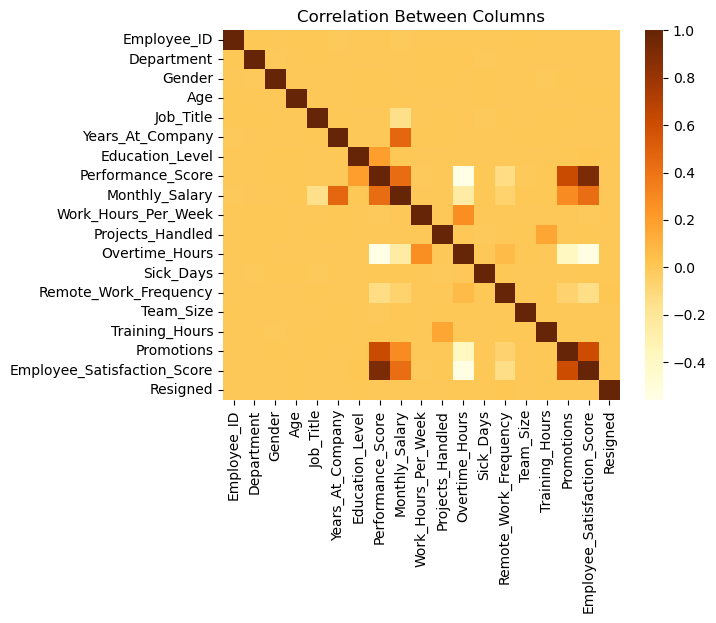

In [44]:
sns.heatmap(df1.select_dtypes(include='number').corr(),cmap='YlOrBr')
plt.title('Correlation Between Columns')
plt.show()

In [45]:
x=df1.drop(columns=['Employee_ID','Department','Gender','Age','Hire_Date','Sick_Days','Team_Size','Resigned','Performance_Score'])
y=df1['Performance_Score']

### Splitting Data (Train-Test Split)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Feature Scaling

In [49]:
ss=StandardScaler()
ssx_train=ss.fit_transform(x_train)
ssx_test=ss.transform(x_test)

# Model Training & Evaluation

#### LogisticRegression

In [52]:
lrc=LogisticRegression()
lrc.fit(ssx_train,y_train)
lrcy_pred=lrc.predict(ssx_test)

Training Accuracy:  0.7297875
Testing Accuracy:  0.7269
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      3264
           1       0.65      0.66      0.65      4017
           2       0.60      0.53      0.57      4053
           3       0.68      0.62      0.65      3906
           4       0.84      0.93      0.88      4760

    accuracy                           0.73     20000
   macro avg       0.72      0.73      0.72     20000
weighted avg       0.72      0.73      0.72     20000



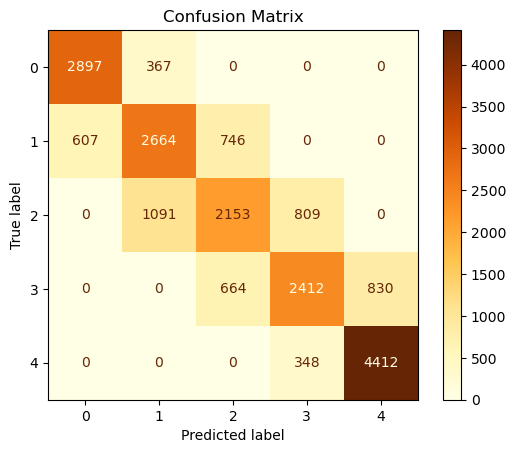

In [53]:
lrc_trs=lrc.score(ssx_train,y_train)
lrc_tss=accuracy_score(y_test,lrcy_pred)
print('Training Accuracy: ',lrc_trs)
print('Testing Accuracy: ',lrc_tss)
print('Classification Report: \n',classification_report(y_test,lrcy_pred))
ConfusionMatrixDisplay.from_predictions(y_test,lrcy_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### KNN

In [55]:
knn=KNeighborsClassifier()
knn.fit(ssx_train,y_train)
knny_pred=knn.predict(ssx_test)

Training Accuracy:  0.835525
Testing Accuracy:  0.7386
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      3264
           1       0.66      0.67      0.66      4017
           2       0.60      0.53      0.56      4053
           3       0.71      0.61      0.66      3906
           4       0.85      0.94      0.89      4760

    accuracy                           0.74     20000
   macro avg       0.73      0.74      0.73     20000
weighted avg       0.73      0.74      0.73     20000



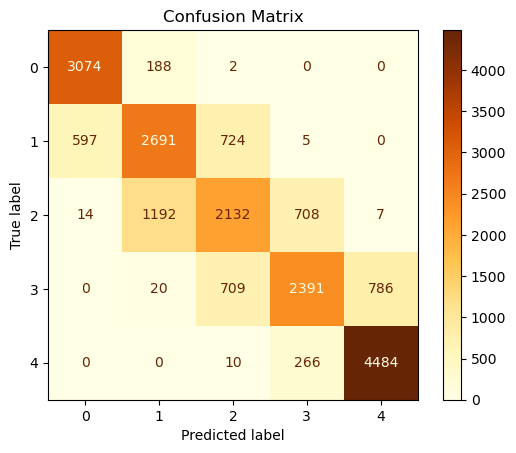

In [56]:
knn_trs=knn.score(ssx_train,y_train)
knn_tss=accuracy_score(y_test,knny_pred)
print('Training Accuracy: ',knn_trs)
print('Testing Accuracy: ',knn_tss)
print('Classification Report: \n',classification_report(y_test,knny_pred))
ConfusionMatrixDisplay.from_predictions(y_test,knny_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### GaussianNB

In [58]:
gnb=GaussianNB()
gnb.fit(ssx_train,y_train)
gnby_pred=gnb.predict(ssx_test)

Training Accuracy:  0.66555
Testing Accuracy:  0.66755
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      1.00      0.80      3264
           1       0.60      0.32      0.41      4017
           2       0.54      0.54      0.54      4053
           3       0.61      0.66      0.64      3906
           4       0.85      0.86      0.86      4760

    accuracy                           0.67     20000
   macro avg       0.65      0.67      0.65     20000
weighted avg       0.66      0.67      0.65     20000



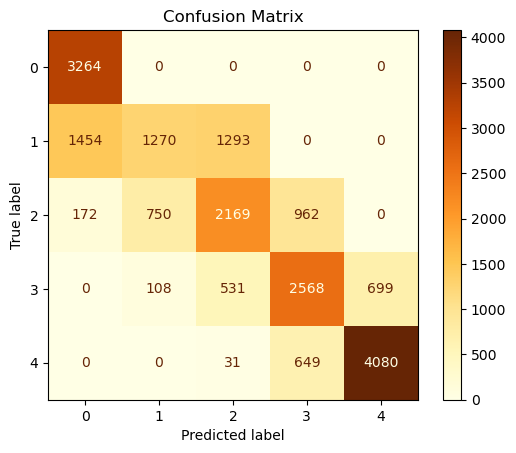

In [59]:
gnb_trs=gnb.score(ssx_train,y_train)
gnb_tss=accuracy_score(y_test,gnby_pred)
print('Training Accuracy: ',gnb_trs)
print('Testing Accuracy: ',gnb_tss)
print('Classification Report: \n',classification_report(y_test,gnby_pred))
ConfusionMatrixDisplay.from_predictions(y_test,gnby_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### SVC

In [61]:
svc=SVC()
svc.fit(ssx_train,y_train)
svcy_pred=svc.predict(ssx_test)

Training Accuracy:  0.8380875
Testing Accuracy:  0.8269
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      3264
           1       0.78      0.85      0.81      4017
           2       0.82      0.60      0.69      4053
           3       0.79      0.71      0.75      3906
           4       0.86      0.99      0.92      4760

    accuracy                           0.83     20000
   macro avg       0.82      0.83      0.82     20000
weighted avg       0.82      0.83      0.82     20000



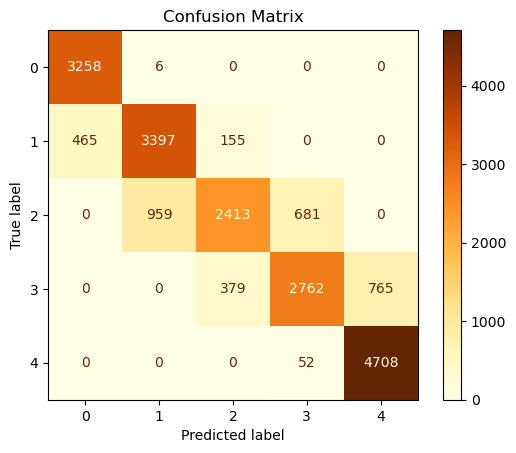

In [62]:
svc_trs=svc.score(ssx_train,y_train)
svc_tss=accuracy_score(y_test,svcy_pred)
print('Training Accuracy: ',svc_trs)
print('Testing Accuracy: ',svc_tss)
print('Classification Report: \n',classification_report(y_test,svcy_pred))
ConfusionMatrixDisplay.from_predictions(y_test,svcy_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### DecisionTreeClassifier

In [64]:
dtc=DecisionTreeClassifier()
dtc.fit(ssx_train,y_train)
dtcy_pred=dtc.predict(ssx_test)

Training Accuracy:  1.0
Testing Accuracy:  0.9726
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3264
           1       0.97      0.97      0.97      4017
           2       0.95      0.96      0.95      4053
           3       0.96      0.96      0.96      3906
           4       0.99      0.99      0.99      4760

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



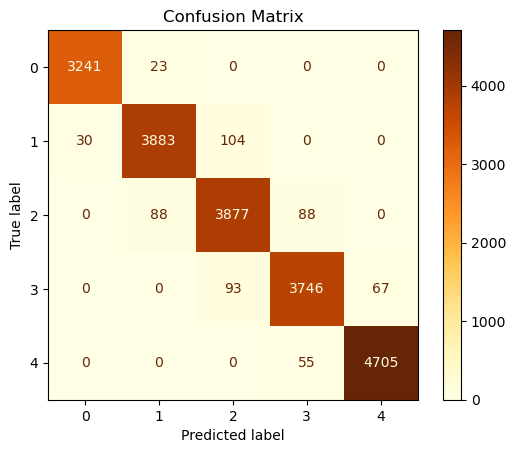

In [65]:
dtc_trs=dtc.score(ssx_train,y_train)
dtc_tss=accuracy_score(y_test,dtcy_pred)
print('Training Accuracy: ',dtc_trs)
print('Testing Accuracy: ',dtc_tss)
print('Classification Report: \n',classification_report(y_test,dtcy_pred))
ConfusionMatrixDisplay.from_predictions(y_test,dtcy_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### RandomForestClassifier

In [67]:
rfc=RandomForestClassifier()
rfc.fit(ssx_train,y_train)
rfcy_pred=rfc.predict(ssx_test)

Training Accuracy:  1.0
Testing Accuracy:  0.92045
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      3264
           1       0.89      0.91      0.90      4017
           2       0.94      0.85      0.89      4053
           3       0.94      0.85      0.89      3906
           4       0.92      0.99      0.96      4760

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



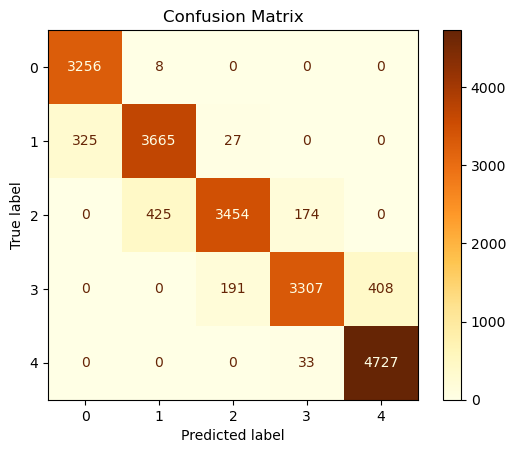

In [68]:
rfc_trs=rfc.score(ssx_train,y_train)
rfc_tss=accuracy_score(y_test,rfcy_pred)
print('Training Accuracy: ',rfc_trs)
print('Testing Accuracy: ',rfc_tss)
print('Classification Report: \n',classification_report(y_test,rfcy_pred))
ConfusionMatrixDisplay.from_predictions(y_test,rfcy_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### AdaBoost

In [70]:
adb=AdaBoostClassifier()
adb.fit(ssx_train,y_train)
adby_pred=adb.predict(ssx_test)

Training Accuracy:  0.61815
Testing Accuracy:  0.62405
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      1.00      0.78      3264
           1       0.00      0.00      0.00      4017
           2       0.45      0.57      0.50      4053
           3       0.56      0.70      0.62      3906
           4       0.84      0.88      0.86      4760

    accuracy                           0.62     20000
   macro avg       0.50      0.63      0.55     20000
weighted avg       0.51      0.62      0.56     20000



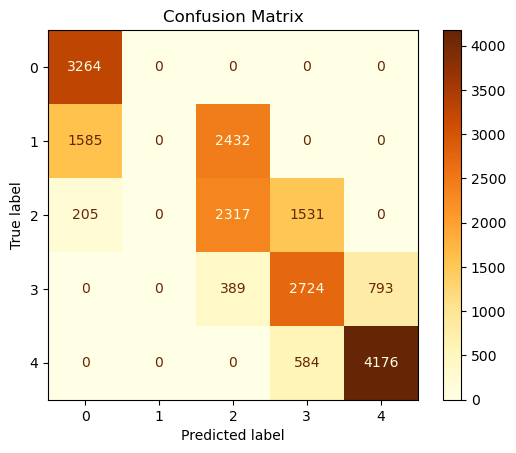

In [71]:
adb_trs=adb.score(ssx_train,y_train)
adb_tss=accuracy_score(y_test,adby_pred)
print('Training Accuracy: ',adb_trs)
print('Testing Accuracy: ',adb_tss)
print('Classification Report: \n',classification_report(y_test,adby_pred))
ConfusionMatrixDisplay.from_predictions(y_test,adby_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### GradientBoost

In [73]:
gbc=GradientBoostingClassifier()
gbc.fit(ssx_train,y_train)
gbcy_pred=gbc.predict(ssx_test)

Training Accuracy:  0.85695
Testing Accuracy:  0.8508
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      3264
           1       0.79      0.90      0.84      4017
           2       0.87      0.64      0.73      4053
           3       0.84      0.73      0.78      3906
           4       0.87      0.99      0.93      4760

    accuracy                           0.85     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.85      0.85      0.84     20000



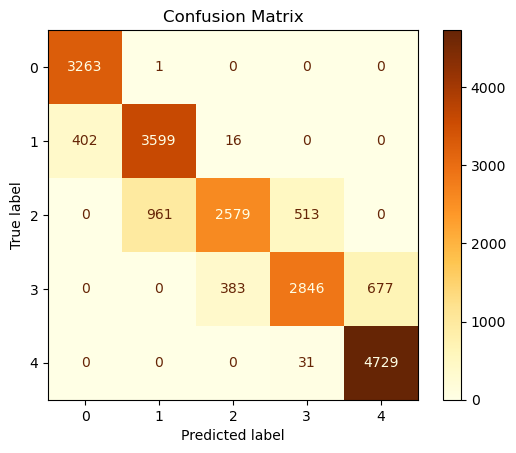

In [74]:
gbc_trs=gbc.score(ssx_train,y_train)
gbc_tss=accuracy_score(y_test,gbcy_pred)
print('Training Accuracy: ',gbc_trs)
print('Testing Accuracy: ',gbc_tss)
print('Classification Report: \n',classification_report(y_test,gbcy_pred))
ConfusionMatrixDisplay.from_predictions(y_test,gbcy_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

#### XGBClassifier

In [76]:
xgb=XGBClassifier()
xgb.fit(ssx_train,y_train)
xgby_pred=xgb.predict(ssx_test)

Training Accuracy:  0.9991375
Testing Accuracy:  0.99835
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3264
           1       0.99      1.00      1.00      4017
           2       1.00      0.99      1.00      4053
           3       1.00      1.00      1.00      3906
           4       1.00      1.00      1.00      4760

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



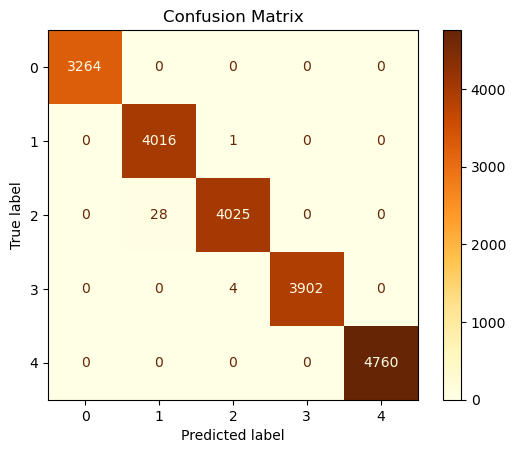

In [77]:
xgb_trs=xgb.score(ssx_train,y_train)
xgb_tss=accuracy_score(y_test,xgby_pred)
print('Training Accuracy: ',xgb_trs)
print('Testing Accuracy: ',xgb_tss)
print('Classification Report: \n',classification_report(y_test,xgby_pred))
ConfusionMatrixDisplay.from_predictions(y_test,xgby_pred,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

In [79]:
Tuned=pd.DataFrame({'Model':['LogisticRegression','KNN','GaussianNB','SVC','DecisionTreeClassifier','RandomForestClassifier','AdaBoost','GradientBoost','XGBoost'],
                    'Training Score':[lrc_trs,knn_trs,gnb_trs,svc_trs,dtc_trs,rfc_trs,adb_trs,gbc_trs,xgb_trs],
                    'Accuracy Score':[lrc_tss,knn_tss,gnb_tss,svc_tss,dtc_tss,rfc_tss,adb_tss,gbc_tss,xgb_tss]})
Tuned.sort_values(by='Accuracy Score', ascending=False)

,Model,Training Score,Accuracy Score
8,XGBoost,0.999138,0.99835
4,DecisionTreeClassifier,1.000000,0.97260
5,RandomForestClassifier,1.000000,0.92045
7,GradientBoost,0.856950,0.85080
3,SVC,0.838087,0.82690
1,KNN,0.835525,0.73860
0,LogisticRegression,0.729788,0.72690
2,GaussianNB,0.665550,0.66755
6,AdaBoost,0.618150,0.62405


# Hyperparameter Tuning

In [81]:
xgb_param_grid={
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
}
xgb_gs=GridSearchCV(estimator=xgb,param_grid=xgb_param_grid,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)
xgb_gs.fit(ssx_train,y_train)
print('Best Parameters: ',xgb_gs.best_params_)
print('Best Accuracy: ',xgb_gs.best_score_)
xgb_bm=xgb_gs.best_estimator_
xgby_pred_bm=xgb_bm.predict(ssx_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy:  0.9975625000000001


Training Accuracy:  0.9991125
Testing Accuracy:  0.99815
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3264
           1       0.99      1.00      1.00      4017
           2       1.00      0.99      1.00      4053
           3       1.00      1.00      1.00      3906
           4       1.00      1.00      1.00      4760

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



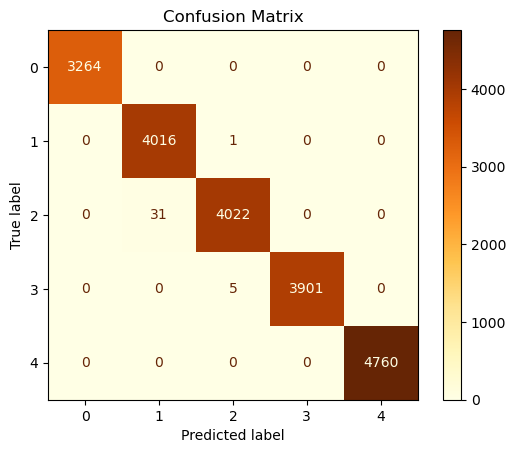

In [82]:
xgb_gs_trs=xgb_bm.score(ssx_train,y_train)
xgb_gs_tss=accuracy_score(y_test,xgby_pred_bm)
print('Training Accuracy: ',xgb_gs_trs)
print('Testing Accuracy: ',xgb_gs_tss)
print('Classification Report: \n',classification_report(y_test,xgby_pred_bm))
ConfusionMatrixDisplay.from_predictions(y_test,xgby_pred_bm,cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

# Model Deployment

In [83]:
joblib.dump(xgb_bm,r'C:\Users\HP\PerformanceModel.pkl')
joblib.dump(le_job,r'C:\Users\HP\LabelEncoder_Job.pkl')
joblib.dump(le_edu,r'C:\Users\HP\LabelEncoder_Edu.pkl')
joblib.dump(le_per,r'C:\Users\HP\LabelEncoder_Per.pkl')
joblib.dump(le_rwf,r'C:\Users\HP\LabelEncoder_Rwf.pkl')
joblib.dump(le_ess,r'C:\Users\HP\LabelEncoder_Ess.pkl')
joblib.dump(ss,r'C:\Users\HP\StandardScaler1.pkl')

['C:\\Users\\HP\\StandardScaler1.pkl']